In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
d = files.upload()

Saving Customer+List.csv to Customer+List.csv


In [ ]:
df = pd.read_csv('Customer+List.csv')

In [ ]:
df.shape

(400, 5)

In [ ]:
df.head()

,Customer ID,Gender,Age,Salary,Purchased
0,1,Male,19,19000,0
1,2,Male,35,20000,0
2,3,Female,26,43000,0
3,4,Female,27,57000,0
4,5,Male,19,76000,0


In [ ]:
df.tail()

,Customer ID,Gender,Age,Salary,Purchased
395,396,Female,46,41000,1
396,397,Male,51,23000,1
397,398,Female,50,20000,1
398,399,Male,36,33000,0
399,400,Female,49,36000,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  400 non-null    int64 
 1   Gender       400 non-null    object
 2   Age          400 non-null    int64 
 3   Salary       400 non-null    int64 
 4   Purchased    400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
df=df.drop('Customer ID', axis = 1)

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Salary,0
Purchased,0


In [ ]:
df

,Gender,Age,Salary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,3:4]

In [ ]:
x

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [ ]:
from sklearn import preprocessing
x_norm = preprocessing.normalize(x)

In [ ]:
x_norm


array([[5.26315526e-05, 9.99999499e-04, 9.99999499e-01],
       [4.99999234e-05, 1.74999732e-03, 9.99998468e-01],
       [0.00000000e+00, 6.04651052e-04, 9.99999817e-01],
       ...,
       [0.00000000e+00, 2.49999219e-03, 9.99996875e-01],
       [3.03030123e-05, 1.09090844e-03, 9.99999405e-01],
       [0.00000000e+00, 1.36110985e-03, 9.99999074e-01]])

In [ ]:
x_l1norm = preprocessing.normalize(x, norm='l1')

In [ ]:
x_l1norm

array([[5.25762355e-05, 9.98948475e-04, 9.98948475e-01],
       [4.99101617e-05, 1.74685566e-03, 9.98203234e-01],
       [0.00000000e+00, 6.04285781e-04, 9.99395714e-01],
       ...,
       [0.00000000e+00, 2.49376559e-03, 9.97506234e-01],
       [3.02690922e-05, 1.08968732e-03, 9.98880044e-01],
       [0.00000000e+00, 1.35926101e-03, 9.98640739e-01]])

In [ ]:
x_l2norm = preprocessing.normalize(x, norm='l2')

In [ ]:
x_l2norm

array([[5.26315526e-05, 9.99999499e-04, 9.99999499e-01],
       [4.99999234e-05, 1.74999732e-03, 9.99998468e-01],
       [0.00000000e+00, 6.04651052e-04, 9.99999817e-01],
       ...,
       [0.00000000e+00, 2.49999219e-03, 9.99996875e-01],
       [3.03030123e-05, 1.09090844e-03, 9.99999405e-01],
       [0.00000000e+00, 1.36110985e-03, 9.99999074e-01]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_norm,y,test_size=0.3, random_state=3)

In [ ]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_l1norm,y,test_size=0.3, random_state=3)

In [ ]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(x_l2norm,y,test_size=0.3, random_state=3)

In [ ]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train1,y_train1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
lr.fit(x_train2,y_train2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
lr.fit(x_train3,y_train3)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_predictlr1 = lr.predict(x_test1)

In [ ]:
y_predictlr2 = lr.predict(x_test2)

In [ ]:
y_predictlr3 = lr.predict(x_test3)

In [ ]:
y_predictlr1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_predictlr2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_predictlr3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm1 = confusion_matrix(y_test1,y_predictlr1)

In [ ]:
cm2 = confusion_matrix(y_test2,y_predictlr2)

In [ ]:
cm3 = confusion_matrix(y_test3,y_predictlr3)

In [ ]:
cm1

array([[78,  0],
       [42,  0]])

In [ ]:
cm2

array([[78,  0],
       [42,  0]])

In [ ]:
cm3

array([[78,  0],
       [42,  0]])

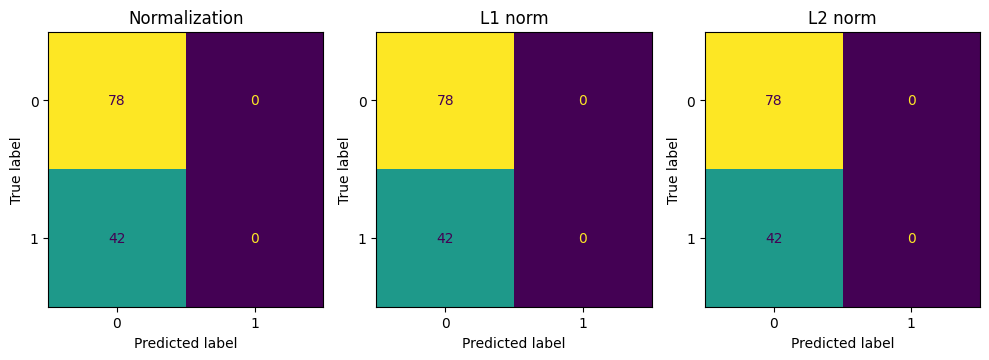

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
titles = ["Normalization", "L1 norm", "L2 norm"]
cms = [cm1, cm2, cm3]

for ax, cm, title in zip(axes, cms, titles):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(title)

plt.tight_layout()
plt.show()
